### calibrate camera

rgbImageNames: 20 , rgbImageNames: ['./camera_cal/calibration1.jpg', './camera_cal/calibration10.jpg', './camera_cal/calibration11.jpg', './camera_cal/calibration12.jpg', './camera_cal/calibration13.jpg', './camera_cal/calibration14.jpg', './camera_cal/calibration15.jpg', './camera_cal/calibration16.jpg', './camera_cal/calibration17.jpg', './camera_cal/calibration18.jpg', './camera_cal/calibration19.jpg', './camera_cal/calibration2.jpg', './camera_cal/calibration20.jpg', './camera_cal/calibration3.jpg', './camera_cal/calibration4.jpg', './camera_cal/calibration5.jpg', './camera_cal/calibration6.jpg', './camera_cal/calibration7.jpg', './camera_cal/calibration8.jpg', './camera_cal/calibration9.jpg']
FIGURECOLUMNCOUNT: 3 , figureRowCount: 20
objectPoints.shape: (54, 3) , objectPoints: [ 0.  0.  0.] [ 1.  0.  0.] [ 2.  0.  0.] [ 8.  5.  0.]
status: False , rgbImageName: ./camera_cal/calibration1.jpg
status: False , rgbImageName: ./camera_cal/calibration4.jpg
status: False , rgbImageName: .

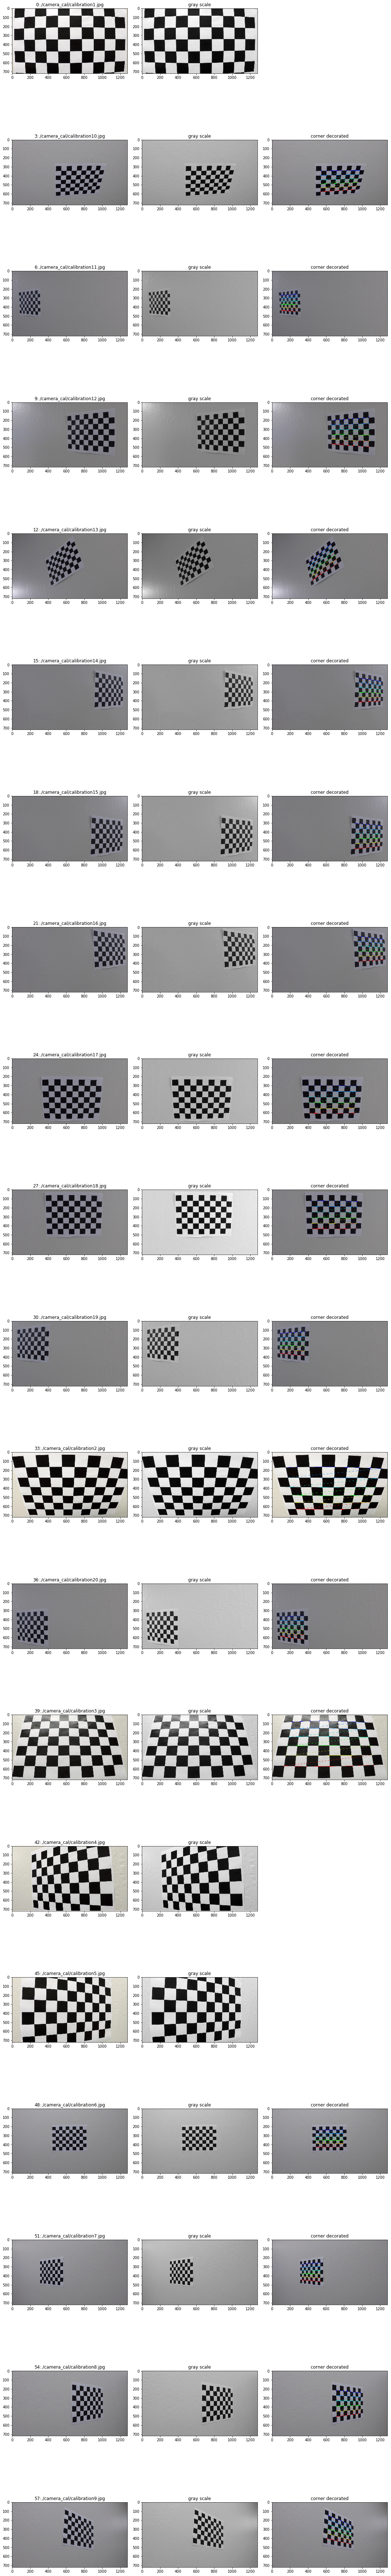

In [14]:
import cv2
import numpy as np

import matplotlib.image as mpimage
import matplotlib.pyplot as plt


DOALL=True
if DOALL:
    import glob
    rgbImageNames=glob.glob("./camera_cal/calibration*.jpg")
else:
    rgbImageNames=np.array(["./camera_cal/calibration1.jpg"])
    print("rgbImageNames.shape:", rgbImages.shape, ", rgbImageNames[0]:", rgbImageNames[0])
rgbImageNames.sort()
print("rgbImageNames:", len(rgbImageNames), ", rgbImageNames:", rgbImageNames)

%matplotlib inline
FIGURECOLUMNCOUNT=3
figureRowCount=len(rgbImageNames)
print("FIGURECOLUMNCOUNT:", FIGURECOLUMNCOUNT, ", figureRowCount:", figureRowCount)

showImages = plt.figure(figsize = (FIGURECOLUMNCOUNT*5,figureRowCount*5))

calibrationImageRows=6 # Y coordinate
calibrationImageColumns=9 # X coordinate

objectPoints=np.zeros((calibrationImageRows*calibrationImageColumns,3))
objectPoints[:]=[ [x,y,0] for y in range(calibrationImageRows) for x in range(calibrationImageColumns) ] # one entry for every interior point, each entry: x,y,x
print("objectPoints.shape:", objectPoints.shape, ", objectPoints:", objectPoints[0], objectPoints[1], objectPoints[2], objectPoints[-1])

allImagePoints=[]
allObjectPoints=[]
validImageNames=[]

grayScaleImage=None

for imageIndex,rgbImageName in zip (range(0,FIGURECOLUMNCOUNT*figureRowCount,FIGURECOLUMNCOUNT), rgbImageNames):
    rgbImage=mpimage.imread(rgbImageName)


    p=showImages.add_subplot(figureRowCount,FIGURECOLUMNCOUNT,imageIndex+1)
    p.set_title(str(imageIndex)+":"+rgbImageName)
    p.imshow(rgbImage)

    grayScaleImage = cv2.cvtColor(rgbImage, cv2.COLOR_RGB2GRAY)
    p=showImages.add_subplot(figureRowCount,FIGURECOLUMNCOUNT,imageIndex+2)
    p.set_title("gray scale")
    p.imshow(grayScaleImage, cmap='gray')

    #for i in range(3,15):
    #    for j in range(3,15):
    #        status, corners = cv2.findChessboardCorners(grayScaleImage, (i,j), None)
    #        print("status:", status, "i:", i, "j:",j)
    #        if status:
    #            print("status:", status, "i:", i, "j:",j)
    status, corners = cv2.findChessboardCorners(grayScaleImage, (calibrationImageColumns,calibrationImageRows), None)
    #print("status:", status, ", rgbImageName:", rgbImageName)
    
    if status:
        #print("status:", status, ", rgbImageName:", rgbImageName, ", corners.shape:", corners.shape, "corners[0]:", corners[0])
        decoratedImage = cv2.drawChessboardCorners(rgbImage, (calibrationImageColumns,calibrationImageRows), corners, status)
        p=showImages.add_subplot(figureRowCount,FIGURECOLUMNCOUNT,imageIndex+3)
        p.set_title("corner decorated")
        #print("status:", status, ", corners.shape:", corners.shape)
        p.imshow(decoratedImage)
        imagePoints=corners.reshape(corners.shape[0],corners.shape[2])
        #print("imagePoints.shape:", imagePoints.shape)
        allImagePoints.append(imagePoints.astype('float32'))
        allObjectPoints.append(objectPoints.astype('float32'))
        validImageNames.append(rgbImageName)
    else:
        print("status:", status, ", rgbImageName:", rgbImageName)        

print("allImagePoints:", len(allImagePoints), ", allObjectPoints:", len(allObjectPoints))
assert len(allImagePoints) == len(allObjectPoints)
print("allImagePoints[0].shape:", allImagePoints[0].shape, ", allObjectPoints[0].shape:", allObjectPoints[0].shape)

plt.tight_layout()

status, cameraMatrix, distortionCoefficients, rotationVectors, translationVectors = cv2.calibrateCamera(allObjectPoints, allImagePoints, grayScaleImage.shape[::-1], None, None)
print("status:", status, ", cameraMatrix:", cameraMatrix, ", distortionCoefficients:", distortionCoefficients)
print("rotationVectors:", len(rotationVectors), ", translationVectors:", len(translationVectors))
print("rotationVectors[0]:", rotationVectors[0], ", translationVectors[0]:", translationVectors[0])

#plt.close()


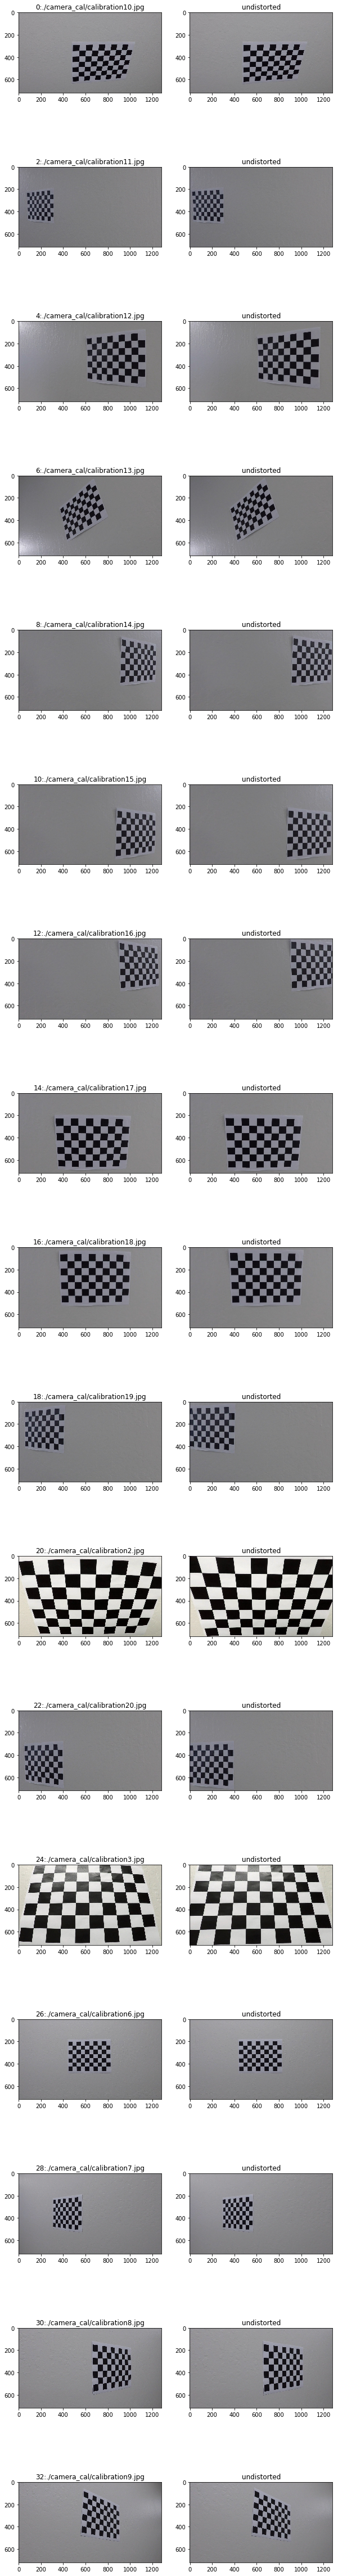

In [16]:
FIGURECOLUMNCOUNT=2
figureRowCount=len(validImageNames)
showImages = plt.figure(figsize = (FIGURECOLUMNCOUNT*5,figureRowCount*5))

for imageIndex,validImageName in zip (range(0,FIGURECOLUMNCOUNT*figureRowCount,FIGURECOLUMNCOUNT), validImageNames):
    rgbImage=mpimage.imread(validImageName)


    p=showImages.add_subplot(figureRowCount,FIGURECOLUMNCOUNT,imageIndex+1)
    p.set_title(str(imageIndex)+":"+validImageName)
    p.imshow(rgbImage)
    
    undistortedImage = cv2.undistort(rgbImage, cameraMatrix, distortionCoefficients, None, cameraMatrix)
    p=showImages.add_subplot(figureRowCount,FIGURECOLUMNCOUNT,imageIndex+2)
    p.set_title("undistorted")
    p.imshow(undistortedImage)
